In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Vaccinations

In [2]:
dfv = pd.read_csv('../MyVizProject/data_vacc.csv', na_values='',  parse_dates=True, encoding = "ISO-8859-1")
dfv.tail()

,ï»¿_id,Date,CA,CAQF,CAName,Sex,SexQF,AgeGroup,AgeGroupQF,Population,...,Dose,DoseQF,NumberVaccinated,NumberVaccinatedQF,PercentCoverage,PercentCoverageQF,CumulativeNumberVaccinated,CumulativeNumberVaccinatedQF,CumulativePercentCoverage,CumulativePercentCoverageQF
489187,489188,20210713,S12000050,NaN,North Lanarkshire,Total,d,60 - 64,NaN,21107.0,...,Dose 2,NaN,2,NaN,0.009476,NaN,20992,NaN,99.455157,NaN
489188,489189,20210713,S12000050,NaN,North Lanarkshire,Total,d,65 - 69,NaN,17976.0,...,Dose 2,NaN,0,NaN,0.000000,NaN,17529,NaN,97.513351,NaN
489189,489190,20210713,S12000050,NaN,North Lanarkshire,Total,d,70 - 74,NaN,15922.0,...,Dose 2,NaN,0,NaN,0.000000,NaN,15807,NaN,99.277729,NaN
489190,489191,20210713,S12000050,NaN,North Lanarkshire,Total,d,75 - 79,NaN,11223.0,...,Dose 2,NaN,0,NaN,0.000000,NaN,10842,NaN,96.605186,NaN
489191,489192,20210713,S12000050,NaN,North Lanarkshire,Total,d,80 years and over,d,13978.0,...,Dose 2,NaN,1,NaN,0.007154,NaN,13091,NaN,93.654314,NaN


In [3]:
df_v = dfv[['Date','CAName','Sex', 'AgeGroup','Dose', 'NumberVaccinated']]
df_v["Date"] = pd.to_datetime(df_v.loc[:, 'Date'], format='%Y%m%d')
df_v.head()

C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,CAName,Sex,AgeGroup,Dose,NumberVaccinated
0,2020-12-08,Unknown,Female,18 - 29,Dose 1,0
1,2020-12-08,Unknown,Female,18 years and over,Dose 1,2
2,2020-12-08,Unknown,Female,30 - 39,Dose 1,0
3,2020-12-08,Unknown,Female,40 - 49,Dose 1,1
4,2020-12-08,Unknown,Female,50 - 54,Dose 1,0


In [5]:
print("Date range is: " + str(df_v.Date.min()) +' to '+ str(df_v.Date.max()))

Date range is: 2020-12-08 00:00:00 to 2021-07-13 00:00:00


In [6]:
df_vacc = df_v[(df_v.AgeGroup =='18 years and over') & (df_v.Sex =='Total')]
df_vacc

,Date,CAName,Sex,AgeGroup,Dose,NumberVaccinated
23,2020-12-08,Unknown,Total,18 years and over,Dose 1,4
57,2020-12-08,Unknown,Total,18 years and over,Dose 2,0
91,2020-12-08,Clackmannanshire,Total,18 years and over,Dose 1,66
125,2020-12-08,Clackmannanshire,Total,18 years and over,Dose 2,0
159,2020-12-08,Dumfries and Galloway,Total,18 years and over,Dose 1,35
...,...,...,...,...,...,...
489045,2021-07-13,Perth and Kinross,Total,18 years and over,Dose 2,286
489079,2021-07-13,Glasgow City,Total,18 years and over,Dose 1,1336
489113,2021-07-13,Glasgow City,Total,18 years and over,Dose 2,1845
489147,2021-07-13,North Lanarkshire,Total,18 years and over,Dose 1,82


In [7]:
df_vacc = df_vacc.groupby(['Date']).sum()
df_vacc.head(40)

,NumberVaccinated
Date,
2020-12-08,1896
2020-12-09,3838
2020-12-10,4930
2020-12-11,5268
2020-12-12,2128
2020-12-13,1111
2020-12-14,5687
2020-12-15,7346
2020-12-16,7153


In [23]:
df_vacc_adj = (((df_vacc.rolling(7)).mean())).shift(22).rolling(68, min_periods=1).sum().fillna(0).round()
df_vacc_adj.head(50)

,NumberVaccinated
Date,
2020-12-08,0.0
2020-12-09,0.0
2020-12-10,0.0
2020-12-11,0.0
2020-12-12,0.0
2020-12-13,0.0
2020-12-14,0.0
2020-12-15,0.0
2020-12-16,0.0


In [25]:
vaccs = df_vacc_adj.loc[(df_vacc_adj.index>='2021-01-05')&(df_vacc_adj.index<='2021-06-30')]
vaccs.NumberVaccinated = vaccs.NumberVaccinated.round(0).astype(int)
vaccs.to_csv('output_raw_vaccs.csv')
vaccs.tail(10)

C:\Users\Maria\Anaconda3\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,NumberVaccinated
Date,
2021-06-21,2787232
2021-06-22,2784437
2021-06-23,2781826
2021-06-24,2779838
2021-06-25,2777928
2021-06-26,2777399
2021-06-27,2777792
2021-06-28,2778705
2021-06-29,2779091


## Positive Cases

In [18]:
df = pd.read_csv('../MyVizProject/data_cases_la.csv',na_values='',index_col ='ï»¿_id',encoding = "ISO-8859-1")
df.head()

,Date,CA,CAName,DailyPositive,CumulativePositive,CrudeRatePositive,CrudeRate7DayPositive,DailyDeaths,CumulativeDeaths,CrudeRateDeaths,...,CumulativeNegative,CrudeRateNegative,TotalTests,PositiveTests,PositivePercentage,PositivePercentage7Day,TotalPillar1,TotalPillar2,PositivePillar1,PositivePillar2
ï»¿_id,,,,,,,,,,,,,,,,,,,,,
1,20200228,S12000005,Clackmannanshire,0,0,0.0,NaN,0,0,0.0,...,4,7.760962,6,0,0.0,0.0,6,0,0,0
2,20200228,S12000006,Dumfries & Galloway,0,0,0.0,NaN,0,0,0.0,...,9,6.045949,9,0,0.0,0.0,9,0,0,0
3,20200228,S12000008,East Ayrshire,0,0,0.0,NaN,0,0,0.0,...,0,0.000000,1,0,0.0,0.0,1,0,0,0
4,20200228,S12000010,East Lothian,0,0,0.0,NaN,0,0,0.0,...,7,6.536558,7,0,0.0,0.0,7,0,0,0
5,20200228,S12000011,East Renfrewshire,0,0,0.0,NaN,0,0,0.0,...,2,2.093583,3,0,0.0,0.0,3,0,0,0


In [19]:
df = df.rename(columns = {'ï»¿_id':'id'})
df["Date"] = pd.to_datetime(df.loc[:, 'Date'], format='%Y%m%d')

In [20]:
df_cases = df[[ 'Date', 'CA', 'CAName', 'DailyPositive']]#.set_index('Date')
df_cases.head()

,Date,CA,CAName,DailyPositive
ï»¿_id,,,,
1,2020-02-28,S12000005,Clackmannanshire,0
2,2020-02-28,S12000006,Dumfries & Galloway,0
3,2020-02-28,S12000008,East Ayrshire,0
4,2020-02-28,S12000010,East Lothian,0
5,2020-02-28,S12000011,East Renfrewshire,0


In [21]:
df_cases = df_cases.groupby(['Date']).sum()
df_cases.tail(14)

,DailyPositive
Date,
2021-07-01,3433
2021-07-02,3084
2021-07-03,2507
2021-07-04,2410
2021-07-05,3377
2021-07-06,3088
2021-07-07,2905
2021-07-08,2725
2021-07-09,2385


In [ ]:
df_cases = ((df_cases.rolling(7).mean())) \
            .shift(-7).rolling(1).mean().fillna(0)

# shift(-7) moves each value back by 7 days.

In [22]:
df_cases1 = ((df_cases.rolling(7).mean())).shift(-7).rolling(1).mean().fillna(0)
# shift(-7) moves it back by 7 days to the day of exposure.
df_cases1.tail(25)

,DailyPositive
Date,
2021-06-20,2793.000000
2021-06-21,2920.428571
2021-06-22,3012.142857
2021-06-23,3158.142857
2021-06-24,3227.428571
2021-06-25,3292.285714
2021-06-26,3321.857143
2021-06-27,3307.000000
2021-06-28,3229.714286


In [23]:
cases = df_cases1.loc[(df_cases1.index>='2021-01-05')&(df_cases1.index<='2021-06-30')]
cases.DailyPositive = cases.DailyPositive.round(0).astype(int)
cases.to_csv('output_raw_cases.csv')
cases.tail(20)

C:\Users\Maria\Anaconda3\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,DailyPositive
Date,
2021-06-11,1090
2021-06-12,1132
2021-06-13,1232
2021-06-14,1503
2021-06-15,1782
2021-06-16,2015
2021-06-17,2271
2021-06-18,2470
2021-06-19,2656


## Deaths

In [24]:
df_deaths = df[[ 'Date', 'CA', 'CAName', 'DailyDeaths']]#.set_index('Date')
df_deaths.head()

,Date,CA,CAName,DailyDeaths
ï»¿_id,,,,
1,2020-02-28,S12000005,Clackmannanshire,0
2,2020-02-28,S12000006,Dumfries & Galloway,0
3,2020-02-28,S12000008,East Ayrshire,0
4,2020-02-28,S12000010,East Lothian,0
5,2020-02-28,S12000011,East Renfrewshire,0


In [25]:
df_deaths = df_deaths.groupby(['Date']).sum()
df_deaths.tail(20)

,DailyDeaths
Date,
2021-06-25,1
2021-06-26,8
2021-06-27,3
2021-06-28,3
2021-06-29,3
2021-06-30,1
2021-07-01,1
2021-07-02,2
2021-07-03,3


In [26]:
# checking for inf
n = df_deaths.rolling(7).mean()

n.loc[n.DailyDeaths==np.inf]

,DailyDeaths
Date,


In [ ]:
df_deaths = (df_deaths.rolling(7).mean()) \
            .shift(-14).rolling(1).mean().fillna(0)

# shift(-14) moves each value back by 14 days

In [27]:
df_deaths1 = (df_deaths.rolling(7).mean()).shift(-14).rolling(1).mean().fillna(0)
# shift back by 14 days
df_deaths1.tail(20)

,DailyDeaths
Date,
2021-06-25,5.857143
2021-06-26,6.285714
2021-06-27,6.142857
2021-06-28,5.857143
2021-06-29,4.428571
2021-06-30,4.000000
2021-07-01,0.000000
2021-07-02,0.000000
2021-07-03,0.000000


In [28]:
deaths = df_deaths1.loc[(df_deaths1.index>='2021-01-05')&(df_deaths1.index<='2021-06-30')]
deaths.DailyDeaths = deaths.DailyDeaths.round(0).astype(int)
deaths.to_csv('output_raw_deaths.csv')
deaths.tail(50)

C:\Users\Maria\Anaconda3\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,DailyDeaths
Date,
2021-05-12,1
2021-05-13,1
2021-05-14,1
2021-05-15,1
2021-05-16,1
2021-05-17,1
2021-05-18,1
2021-05-19,1
2021-05-20,1


## Hospital Admissions

In [29]:
cols = ['Date','HospitalAdmissions']
df_ha = pd.read_csv('../MyVizProject/data_hospital_admissions_HB.csv',na_values='',usecols=cols,encoding = "ISO-8859-1")
df_ha.head()

,Date,HospitalAdmissions
0,20200228,NaN
1,20200228,NaN
2,20200228,NaN
3,20200228,NaN
4,20200228,NaN


In [30]:
df_ha["Date"] = pd.to_datetime(df_ha.loc[:, 'Date'], format='%Y%m%d')
#df_ha.head()

In [31]:
df_ha = df_ha.groupby(['Date']).sum()
df_ha.head(10)

,HospitalAdmissions
Date,
2020-02-28,0.0
2020-02-29,0.0
2020-03-01,5.0
2020-03-02,11.0
2020-03-03,13.0
2020-03-04,10.0
2020-03-05,19.0
2020-03-06,21.0
2020-03-07,10.0


In [ ]:
df_ha = ((df_ha.rolling(7).mean())) \
        .shift(-11).rolling(1).mean().fillna(0)

# shift(-11) moves each value back by 11 days.

In [32]:
df_ha1 = ((df_ha.rolling(7).mean())).shift(-11).rolling(1).mean().fillna(0)
df_ha1.tail(20)

,HospitalAdmissions
Date,
2021-06-25,68.142857
2021-06-26,71.000000
2021-06-27,76.000000
2021-06-28,79.142857
2021-06-29,83.571429
2021-06-30,83.714286
2021-07-01,71.857143
2021-07-02,58.285714
2021-07-03,45.714286


In [33]:
ha = df_ha1[(df_ha1.index>='2021-01-05')&(df_ha1.index<='2021-06-30')]
ha.HospitalAdmissions = ha.HospitalAdmissions.round(0).astype(int)
ha.to_csv('output_raw_ha.csv')
ha.tail(20)

C:\Users\Maria\Anaconda3\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,HospitalAdmissions
Date,
2021-06-11,34
2021-06-12,36
2021-06-13,39
2021-06-14,38
2021-06-15,39
2021-06-16,39
2021-06-17,42
2021-06-18,45
2021-06-19,48


# Line plots

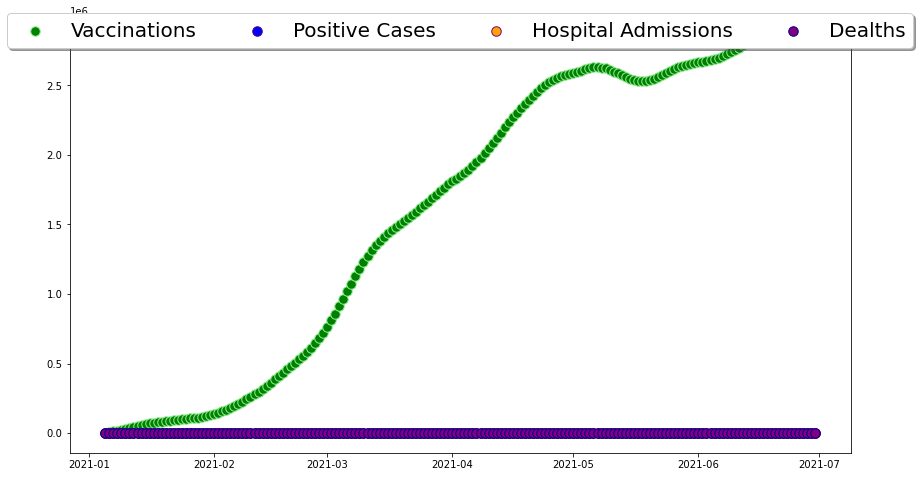

In [111]:
fig,ax = plt.subplots(figsize=(14,8))
#fig = plt.figure(figsize=(10,6))

ax.scatter(vaccs.index, vaccs.NumberVaccinated,label='Vaccinations',c='green', edgecolors='lightgreen',alpha=1, s=90)

ax.scatter(cases.index, cases.DailyPositive,label='Positive Cases', c='blue', edgecolors='indigo',alpha=1, s=90)
ax.scatter(ha.index, ha.HospitalAdmissions,label='Hospital Admissions',c='orange', edgecolors='purple',alpha=1, s=90)

ax.scatter(deaths.index, deaths.DailyDeaths,label='Dealths',c='purple', edgecolors='darkblue',alpha=1, s=90)

plt.legend(title='',title_fontsize='xx-large',loc='center', bbox_to_anchor=(0.5, 0.97), shadow=True, ncol=4, fontsize=20)
plt.show()

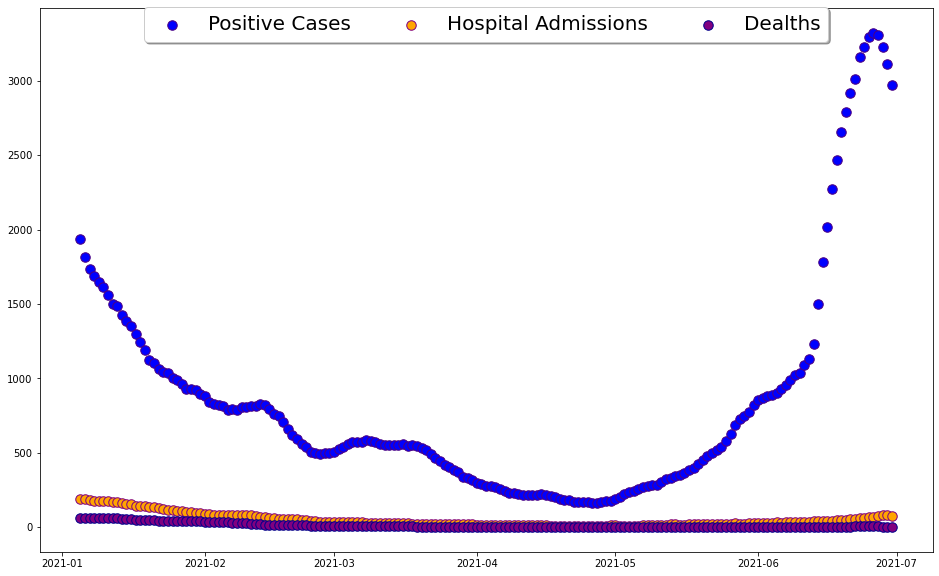

In [35]:
fig,ax = plt.subplots(figsize=(16,10))
#fig = plt.figure(figsize=(10,6))

#ax.scatter(vacc.index, vacc.NumberVaccinated,label='Vaccinations',c='green', edgecolors='lightgreen',alpha=1, s=90)

ax.scatter(cases.index, cases.DailyPositive,label='Positive Cases', c='blue', edgecolors='indigo',alpha=1, s=90)
ax.scatter(ha.index, ha.HospitalAdmissions,label='Hospital Admissions',c='orange', edgecolors='purple',alpha=1, s=90)

ax.scatter(deaths.index, deaths.DailyDeaths,label='Dealths',c='purple', edgecolors='darkblue',alpha=1, s=90)

plt.legend(title='',title_fontsize='xx-large',loc='center', bbox_to_anchor=(0.5, 0.97), shadow=True, ncol=4, fontsize=20)
plt.show()

In [98]:
cases.head()

,DailyPositive,logarithm_base10
Date,,
2021-01-05,1934,3.286456
2021-01-06,1814,3.258637
2021-01-07,1732,3.238548
2021-01-08,1691,3.228144
2021-01-09,1646,3.216430


In [49]:
cases['logarithm_base10'] = np.log10(cases['DailyPositive'])


C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
ha.head()

,HospitalAdmissions,logarithm_base10
Date,,
2021-01-05,191,2.281033
2021-01-06,190,2.278754
2021-01-07,180,2.255273
2021-01-08,178,2.250420
2021-01-09,178,2.250420


In [50]:
ha['logarithm_base10'] =  np.log10(ha['HospitalAdmissions'])


C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
deaths.head()

,DailyDeaths,logarithm_base10
Date,,
2021-01-05,60,1.778151
2021-01-06,62,1.792392
2021-01-07,62,1.792392
2021-01-08,63,1.799341
2021-01-09,60,1.778151


In [51]:
deaths['logarithm_base10'] =  np.log10(deaths['DailyDeaths'])

C:\Users\Maria\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
vaccs.head()

,NumberVaccinated,logarithm_base10
Date,,
2021-01-05,3550,3.550228
2021-01-06,7879,3.896471
2021-01-07,12682,4.103188
2021-01-08,17788,4.250127
2021-01-09,23349,4.368268


In [52]:
vaccs['logarithm_base10'] =  np.log10(vaccs['NumberVaccinated'])

C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


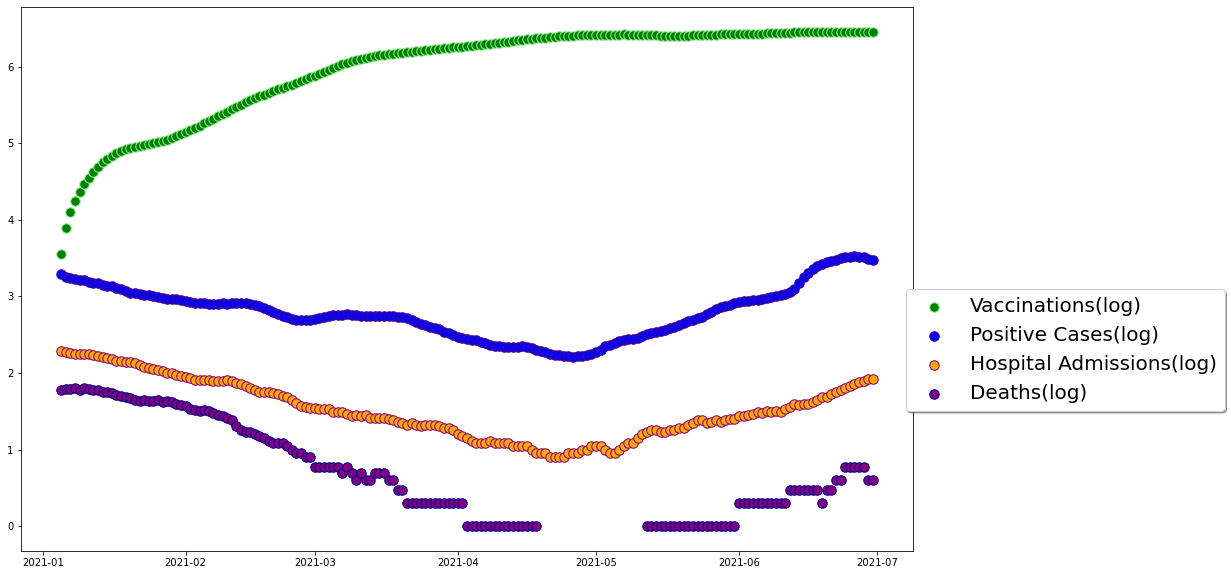

In [53]:
fig,ax = plt.subplots(figsize=(16,10))
#fig = plt.figure(figsize=(10,6))

ax.scatter(vaccs.index, vaccs.logarithm_base10,label='Vaccinations(log)',c='green', edgecolors='lightgreen',alpha=1, s=90)

ax.scatter(cases.index, cases.logarithm_base10,label='Positive Cases(log)', c='blue', edgecolors='indigo',alpha=1, s=90)
ax.scatter(ha.index, ha.logarithm_base10,label='Hospital Admissions(log)',c='orange', edgecolors='purple',alpha=1, s=90)

ax.scatter(deaths.index, deaths.logarithm_base10,label='Deaths(log)',c='purple', edgecolors='darkblue',alpha=1, s=90)

plt.legend(title='',title_fontsize='xx-large',loc='best', bbox_to_anchor=(0.98, 0.5), shadow=True, ncol=1, fontsize=20)
plt.show()

In [54]:
import scipy
from scipy import stats

In [107]:
#cases
tau_cases, p_value_c = scipy.stats.kendalltau(cases.DailyPositive,vaccs.NumberVaccinated)
tau_cases

-0.2054526315516052

In [108]:
p_value_h

6.288135170467355e-42

In [109]:
#hospitalisations
tau_hosadm, p_value_h = stats.kendalltau(ha.HospitalAdmissions,vaccs.NumberVaccinated)
tau_hosadm

-0.4321398453144885

In [57]:
#deaths
tau_deaths, p_value_d = stats.kendalltau(deaths.DailyDeaths,vaccs.NumberVaccinated)
tau_deaths

-0.605517735830579

In [58]:
 p_value_d

1.1793456542515809e-30

## Frequency Distributions

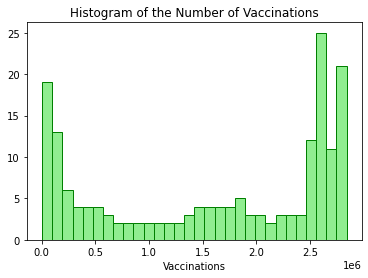

In [49]:
# matplotlib histogram
plt.hist(vaccs.NumberVaccinated, color = 'lightgreen', edgecolor = 'green',  bins = 30)

plt.title('Histogram of the Number of Vaccinations')
plt.xlabel('Vaccinations')

plt.show()

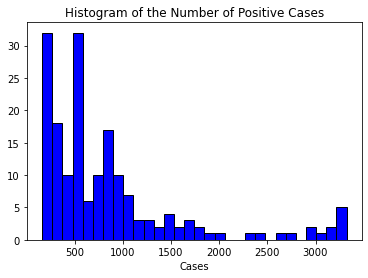

In [50]:
# matplotlib histogram
plt.hist(cases.DailyPositive, color = 'blue', edgecolor = 'black',  bins =30)

plt.title('Histogram of the Number of Positive Cases')
plt.xlabel('Cases')
plt.show()

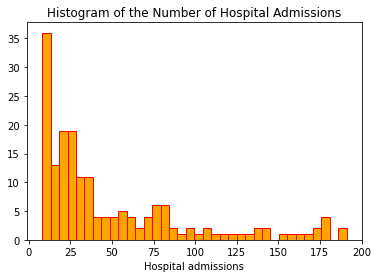

In [51]:
# matplotlib histogram
plt.hist(ha.HospitalAdmissions, color = 'orange', edgecolor = 'red',  bins =36)

plt.title('Histogram of the Number of Hospital Admissions')
plt.xlabel('Hospital admissions')
plt.show()

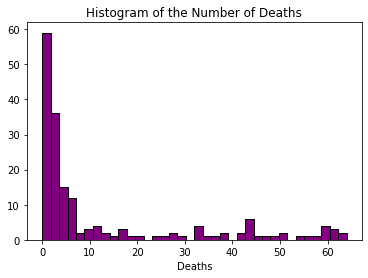

In [61]:
# matplotlib histogram
plt.hist(deaths.DailyDeaths, color = 'purple', edgecolor = 'black',  bins = 36)

plt.title('Histogram of the Number of Deaths')
plt.xlabel('Deaths')

plt.show()

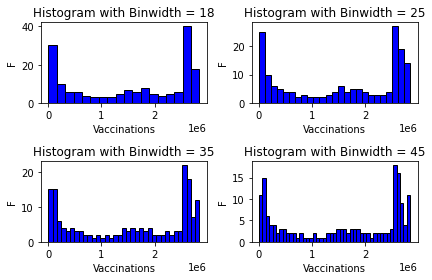

In [60]:

# Show 4 different binwidths
for i, binwidth in enumerate([18, 25, 35,45]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(vacc.NumberVaccinated, bins = binwidth,
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 12)
    ax.set_xlabel('Vaccinations', size = 10)
    ax.set_ylabel('F', size= 10)

plt.tight_layout()
plt.show()

# Raw data

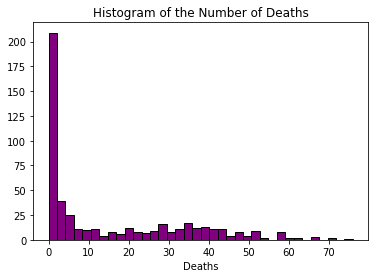

In [62]:
# matplotlib histogram
plt.hist(df_deaths.DailyDeaths, color = 'purple', edgecolor = 'black',  bins = 36)

plt.title('Histogram of the Number of Deaths')
plt.xlabel('Deaths')

plt.show()

## Kendall's tau correlation

In [112]:
#cases
tau, p_value = scipy.stats.kendalltau(cases.DailyPositive,vaccs.NumberVaccinated)
tau

-0.2054526315516052

In [64]:
p_value # <0.0001

4.93907880705156e-05

In [65]:
#deaths
tau, p_value = scipy.stats.kendalltau(deaths.DailyDeaths,vaccs.NumberVaccinated)
tau

-0.605517735830579

In [66]:
p_value

1.1793456542515809e-30

In [67]:
#hospital admissions
tau, p_value = scipy.stats.kendalltau(ha.HospitalAdmissions,vaccs.NumberVaccinated)
tau

-0.4321398453144885

In [68]:
p_value

2.249993263054527e-17

In [ ]:
# pearsons

In [148]:
#cases
coef, p_value_c = stats.pearsonr(cases.DailyPositive,vaccs.NumberVaccinated)
coef

0.031297928684283646

In [114]:
p_value_c

0.6792088400038493

In [71]:
#hospital
coef, p_value_h = stats.pearsonr(ha.HospitalAdmissions,vaccs.NumberVaccinated)
coef

-0.7083667873025871

In [72]:
p_value_h

2.8263306467297503e-28

In [73]:
#deaths
coef, p_value_h = stats.pearsonr(deaths.DailyDeaths,vaccs.NumberVaccinated)
coef

-0.8072447521724517

In [78]:
p_value_h

6.288135170467355e-42

In [151]:
df_age = pd.read_csv('../MyVizProject/output_all_ages1.csv', na_values='',  parse_dates=True, encoding = "ISO-8859-1")
df_age.rename(columns={'DailyPositive':'DailyPositive_adj','DailyDeaths':'DailyDeaths_adj','NumberVaccinated':'NumberVaccinated_adj'}, inplace=True)
df_age.head()

,Date,AgeGroup,DailyPositive_adj,DailyDeaths_adj,NumberVaccinated_adj
0,2021-01-05,over 60,424,55,463
1,2021-01-05,over 75,186,40,48
2,2021-01-05,under 60,2108,4,3087
3,2021-01-06,over 75,183,43,186
4,2021-01-06,over 60,407,57,1127


In [152]:
df_age_under60 = df_age[df_age.AgeGroup=='under 60']
df_age_under60.head()

,Date,AgeGroup,DailyPositive_adj,DailyDeaths_adj,NumberVaccinated_adj
2,2021-01-05,under 60,2108,4,3087
5,2021-01-06,under 60,1758,5,6753
7,2021-01-07,under 60,1428,5,10733
11,2021-01-08,under 60,1274,5,14842
14,2021-01-09,under 60,996,4,19135


In [153]:
df_age_over60 = df_age[df_age.AgeGroup=='over 60']
df_age_over60.head()

,Date,AgeGroup,DailyPositive_adj,DailyDeaths_adj,NumberVaccinated_adj
0,2021-01-05,over 60,424,55,463
4,2021-01-06,over 60,407,57,1127
8,2021-01-07,over 60,375,57,1950
9,2021-01-08,over 60,382,58,2950
13,2021-01-09,over 60,373,56,4218


In [154]:
df_age_over75 = df_age[df_age.AgeGroup=='over 75']
df_age_over75.head()

,Date,AgeGroup,DailyPositive_adj,DailyDeaths_adj,NumberVaccinated_adj
1,2021-01-05,over 75,186,40,48
3,2021-01-06,over 75,183,43,186
6,2021-01-07,over 75,166,43,414
10,2021-01-08,over 75,167,44,762
12,2021-01-09,over 75,162,42,1296


In [ ]:
# Kendalls

In [155]:
#cases
tau_under60, p_value_under60 = stats.kendalltau(df_age_under60.DailyPositive_adj,df_age_under60.NumberVaccinated_adj)
tau_under60

-0.2447577301791708

In [156]:
p_value_under60

1.3320245731773073e-06

In [157]:
#cases
tau_over60, p_value_over60 = stats.kendalltau(df_age_over60.DailyPositive_adj,df_age_over60.NumberVaccinated_adj)
tau_over60

-0.6959276245373999

In [158]:
p_value_over60

1.2413726646613246e-42

In [174]:
#cases
tau_over75, p_value_over75 = stats.kendalltau(df_age_over75.DailyPositive_adj,df_age_over75.NumberVaccinated_adj)
tau_over75

-0.6976774272969806

In [160]:
p_value_over75

7.731219133363268e-42

In [175]:
#deaths
tau_under60, p_value_under60 = stats.kendalltau(df_age_under60.DailyDeaths_adj,df_age_under60.NumberVaccinated_adj)
tau_under60

-0.6567009953360842

In [163]:
p_value_under60

9.286857554082677e-31

In [176]:
#deaths
tau_over60, p_value_over60 = stats.kendalltau(df_age_over60.DailyDeaths_adj,df_age_over60.NumberVaccinated_adj)
tau_over60

-0.779960308750023

In [92]:
p_value_over60

2.3083792169874463e-49

In [177]:
#deaths
tau_over75, p_value_over75 = stats.kendalltau(df_age_over75.DailyDeaths_adj,df_age_over75.NumberVaccinated_adj)
tau_over75

-0.7132124236353833

In [165]:
p_value_over75

1.4419546539098837e-40

In [ ]:
## Pearsons

In [178]:
#cases
p_under60, p_value_under60 = stats.pearsonr(df_age_under60.NumberVaccinated_adj,df_age_under60.DailyPositive_adj)
p_under60

0.022977938485047263

In [179]:
p_value_under60

0.7614511511623314

In [180]:
#cases
p_over60, p_value_over60 = stats.pearsonr(df_age_over60.DailyPositive_adj,df_age_over60.NumberVaccinated_adj)
p_over60

-0.7750092307280251

In [98]:
p_value_over60

1.019385686033185e-36

In [181]:
#cases
p_over75, p_value_over75 = stats.pearsonr(df_age_over75.DailyPositive_adj,df_age_over75.NumberVaccinated_adj)
p_over75

-0.8793421313671593

In [100]:
p_value_over75

2.796119173865255e-58

In [182]:
#deaths
p_under60, p_value_under60 = stats.pearsonr(df_age_under60.DailyDeaths_adj,df_age_under60.NumberVaccinated_adj)
p_under60

-0.7333996243535972

In [145]:
p_value_under60

3.791722619588849e-31

In [183]:
#deaths
p_over60, p_value_over60 = stats.pearsonr(df_age_over60.DailyDeaths_adj,df_age_over60.NumberVaccinated_adj)
p_over60

-0.8590392551961128

In [104]:
p_value_over60

8.989945957328409e-53

In [184]:
#deaths
p_over75, p_value_over75 = stats.pearsonr(df_age_over75.DailyDeaths_adj,df_age_over75.NumberVaccinated_adj)
p_over75

-0.9212141343245976

In [173]:
p_value_over75

1.167107481296553e-73